# get_kmodes_clusters

Based on the work of:\
https://github.com/harika-bonthu/KModes/

KModes Clustering Algorithm for Categorical data. (2021, June 13). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/



In [1]:
# Libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
data = pd.read_excel('supplementary 4 data for k node.xlsx', index_col=0)
data = data.drop(columns=['Component','fimH', 'year'])
data

,Phylogroup,CH Type,blaCTX-M genes,Virulence pattern
1H09,A,ST88,CTX-M-15,1.0
2H09,A,ST88,CTX-M-15,1.0
3H10,B2,ST131,CTXM-GENERAL,3.0
4H10,A,ST44/63,CTXM GENERAL,1.0
5H10,A,ST44/63,CTXM-15,2.0
...,...,...,...,...
58C19,A,ST44/63,CTXM-55,2.0
59C19,B2,ST131,CTXM-15,4.1
60C19,B1,ST101,CTXM-79,1.0
61C19,B2,ST131,CTXM-15,4.1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 260.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 260.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 236.0
Run 1, iteration: 2/100, moves: 9, cost: 226.0
Run 1, iteration: 3/100, moves: 22, cost: 202.0
Run 1, iteration: 4/100, moves: 2, cost: 202.0
Init: initializing centroids
Init: initializing clusters
Starting iteratio

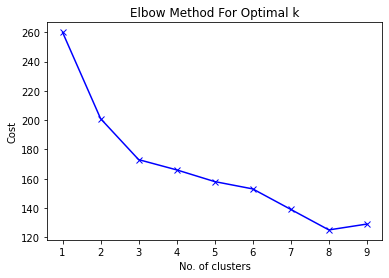

In [3]:
# Use the elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [4]:
# Buil the model with 5 clusters
N = 5
kmode = KModes(n_clusters=N, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4, cost: 193.0
Run 1, iteration: 2/100, moves: 2, cost: 193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 33, cost: 169.0
Run 2, iteration: 2/100, moves: 12, cost: 153.0
Run 2, iteration: 3/100, moves: 0, cost: 153.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 10, cost: 170.0
Run 3, iteration: 2/100, moves: 1, cost: 170.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 29, cost: 190.0
Run 4, iteration: 2/100, moves: 3, cost: 190.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8, cost: 168.0
Run 5, iteration: 2/100, moves: 2, cost: 166.0
Run 5, iteration: 3/100, moves: 0, cost: 166.0
Best run was number 2


array([3, 3, 0, 3, 3, 0, 1, 0, 3, 0, 2, 1, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 1, 0, 4, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 4, 0, 4, 0, 1,
       0, 0, 4, 0, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 0, 0, 3, 4, 3, 0, 1, 3,
       0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0], dtype=uint16)

In [5]:
# Add cluster information to data
data.insert(0, "Cluster", clusters, True)
data

,Cluster,Phylogroup,CH Type,blaCTX-M genes,Virulence pattern
1H09,3,A,ST88,CTX-M-15,1.0
2H09,3,A,ST88,CTX-M-15,1.0
3H10,0,B2,ST131,CTXM-GENERAL,3.0
4H10,3,A,ST44/63,CTXM GENERAL,1.0
5H10,3,A,ST44/63,CTXM-15,2.0
...,...,...,...,...,...
58C19,1,A,ST44/63,CTXM-55,2.0
59C19,0,B2,ST131,CTXM-15,4.1
60C19,3,B1,ST101,CTXM-79,1.0
61C19,0,B2,ST131,CTXM-15,4.1


In [6]:
# Filter data by cluster number 'N'
df0 = data[data['Cluster']==0]
df1 = data[data['Cluster']==1]
df2 = data[data['Cluster']==2]
df3 = data[data['Cluster']==3]
df4 = data[data['Cluster']==4]

In [7]:
# Save data to excel .xlsx
with pd.ExcelWriter('clusters.xlsx') as writer:  
    df0.to_excel(writer, sheet_name='cluster_0')
    df1.to_excel(writer, sheet_name='cluster_1')
    df2.to_excel(writer, sheet_name='cluster_2')
    df3.to_excel(writer, sheet_name='cluster_3')
    df4.to_excel(writer, sheet_name='cluster_4')